# A Couple Handy Tricks
In this lecture, we'll go over a few neat tricks with pandas data frames. These aren't things that are always necessary when analyzing data, but can often make your life significantly easier.

First lets import our modules, read in the data, and do essentially the same preprocessing as the last several videos

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

penguins = pd.read_csv("palmer_penguins.csv")

cols = ["Species", "Region", "Island", "Culmen Length (mm)", "Culmen Depth (mm)", "Sex"]

# select a subset of columns
penguins = penguins[cols]

# shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)

#Shorten names of columns
penguins["Length"]=penguins["Culmen Length (mm)"]
penguins["Depth"]=penguins["Culmen Depth (mm)"]

penguins = penguins.drop(labels=["Culmen Depth (mm)","Culmen Length (mm)"],axis=1)


penguins.head()

,Species,Region,Island,Sex,Length,Depth
0,Adelie,Anvers,Torgersen,MALE,39.1,18.7
1,Adelie,Anvers,Torgersen,FEMALE,39.5,17.4
2,Adelie,Anvers,Torgersen,FEMALE,40.3,18.0
3,Adelie,Anvers,Torgersen,NaN,NaN,NaN
4,Adelie,Anvers,Torgersen,FEMALE,36.7,19.3


## Recoding Columns

In many cases, we might want to recode the data in columns. For example, suppose I'd like to recode the data for the sex of the penguins, replacing "MALE" and "FEMALE" with "m" and "f", respectively. We'd also like to replace the `NaN` values with "unknown."  The most versatile way to do this is to manually specify the recoding map using a dictionary and the `map()` method. `

In [9]:
set(penguins["Sex"])

{'.', 'FEMALE', 'MALE', nan}

In [10]:
#keys are original data codes
#vaues are new data codes
recode={
    "MALE":"M",
    "FEMALE":"F",
    np.nan:"unknown",
    ".":"unknown"
}

penguins["Sex"]=penguins["Sex"].map(recode)

In [11]:
penguins

,Species,Region,Island,Sex,Length,Depth
0,Adelie,Anvers,Torgersen,M,39.1,18.7
1,Adelie,Anvers,Torgersen,F,39.5,17.4
2,Adelie,Anvers,Torgersen,F,40.3,18.0
3,Adelie,Anvers,Torgersen,unknown,NaN,NaN
4,Adelie,Anvers,Torgersen,F,36.7,19.3
...,...,...,...,...,...,...
339,Gentoo,Anvers,Biscoe,unknown,NaN,NaN
340,Gentoo,Anvers,Biscoe,F,46.8,14.3
341,Gentoo,Anvers,Biscoe,M,50.4,15.7
342,Gentoo,Anvers,Biscoe,F,45.2,14.8


In [13]:
set(penguins["Sex"])

{'F', 'M', 'unknown'}

## The `apply` method

Somewhat confusingly, the `apply()` method is not the method used in standard split-apply-combine operations -- `aggregate()` is your go-to. The `apply` method is used when you want to operate on groups without necessarily producing a reduced data frame. 

When using `apply()`, it is necessary to supply a function whose first argument is a data frame. This function will be applied to each group. 

""


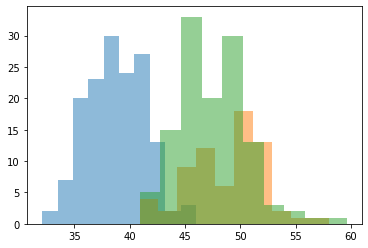

In [15]:
fig, ax = plt.subplots(1)

def plot_hist(df):
    ax.hist(df['Length'], alpha = 0.5)

penguins.groupby("Species").apply(plot_hist)

We can also let the user specify the column name and tranparency

""


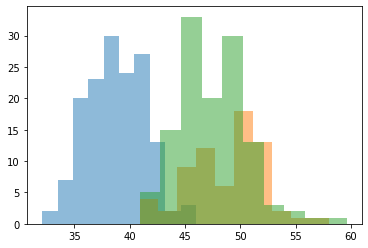

In [16]:
fig, ax = plt.subplots(1)

def plot_hist(df, colname, alpha):
    ax.hist(df[colname], alpha = alpha)

penguins.groupby("Species").apply(plot_hist, 'Length', 0.5)

We can even use **kwargs

""


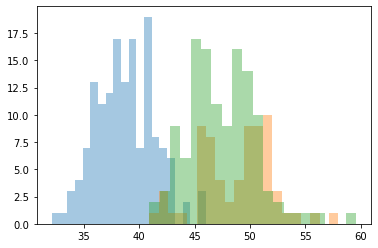

In [29]:
fig, ax = plt.subplots(1)

def plot_hist(df, colname, **kwargs):
    ax.hist(df[colname], **kwargs)

penguins.groupby("Species").apply(plot_hist, 'Length', alpha=.4, bins=20)

In [25]:
?ax.hist